# Bayesian Camera Resectioning
> Let's apply Bayesian analysis to resect a camera

- toc: true 
- badges: true
- comments: true
- categories: [Bayesian, Computer Vision]
- image: images/2020-03-28-Bayesian-Camera-Resectioning/header.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = [20, 20]

from pymc3 import  *

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
size = 200
true_intercept = 0
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

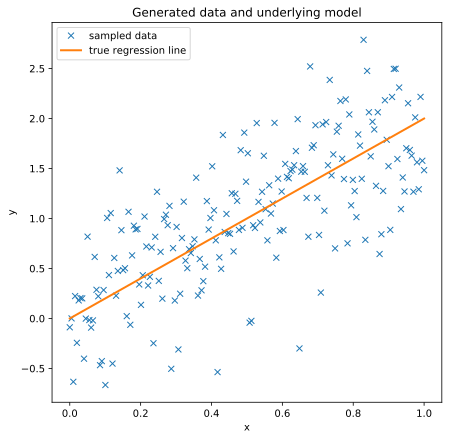

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);


In [7]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)
    

    y_est = intercept + x_coeff * x
    
    # Define likelihood
    likelihood = Normal('y', mu=y_est, sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:04<00:00, 1515.25draws/s]


/anaconda3/envs/PyMC3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/anaconda3/envs/PyMC3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/Users/cooke_c/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

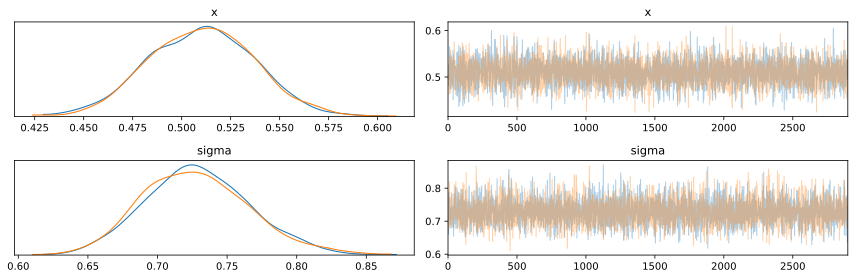

In [5]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

KeyError: 'Intercept'

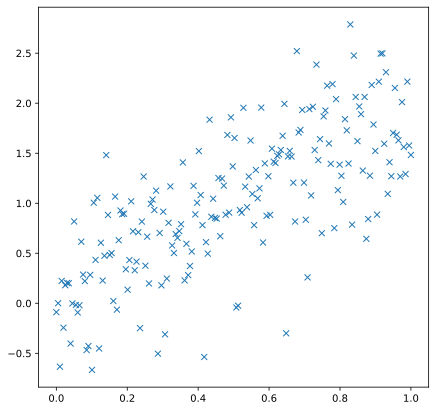

In [6]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')

plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
#plt.bar(age_brackets,members_f_numbers,label='Female',alpha=0.5,width=0.95,color='#A60628')
#plt.bar(age_brackets,members_m_numbers,label='Male',alpha=0.5,width=0.95,color='#348ABD')


\begin{equation*}
x = 
\begin{bmatrix}
a \\
b \\
1
\end{bmatrix}
\end{equation*}

\begin{equation*}
K = 
\begin{bmatrix}
f & c_{x} \\
0 & 1 
\end{bmatrix}
\end{equation*}

\begin{equation*}
R = 
\begin{bmatrix}
R_1 & R_2 \\
R_3 & R_4\\
\end{bmatrix}
\end{equation*}



\begin{equation*}
P = KR[I|−C]
\end{equation*}


\begin{equation*}
C = 
\begin{bmatrix}
-C_X\\
-C_Y\\ 
\end{bmatrix}
\end{equation*}



In [ ]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
#set_matplotlib_formats('svg')

plt.scatter(0,0)
for i in range(0,5):
    x = 5 * (np.random.random()-0.5)
    y = 5 * (np.random.random()-0.5) + 10
    
    plt.plot([0,x],[0,y],color='#348ABD')
    plt.scatter(x,y,color='#348ABD')

plt.xlim(-5,5)
plt.ylim(-1,15)
plt.plot()


